# Predicions on Human Activity Recognition Dataset using SVC - Linear, SVC - RBF & KNN Classification

In [204]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from mlxtend.evaluate import plot_decision_regions
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
%matplotlib inline
# We define labels for the data set
labels = ['WALKING','WALKING UPSTAIRS','WALKING DOWNSTAIRS',
          'SITTING','STANDING','LAYING']

## Defining Abstracions
- get_data - Passing the filenames and extracting data in training and test data
- get_scores  - Generates scores in the form of Confusion matrix, precision, recall 
- do_grid_search - Using StratifiedKFold, getting best score and params for data
- show_plot_confusion_matrix - Using Confusion Matrix creates a summer map

In [69]:
# Function to get data from the file
def get_data(X_train_file, y_train_file, X_test_file, y_test_file):
    # Reads train & test features and labels data from files and returnes them as numpy arrays

    X_train_df = pd.read_csv(X_train_file)
    y_train_df = pd.read_csv(y_train_file)
    X_test_df = pd.read_csv(X_test_file)
    y_test_df = pd.read_csv(y_test_file);

    n_train_samples = X_train_df.shape[0]
    n_test_samples = X_test_df.shape[0]
    n_features = X_train_df.shape[1]

    X_train = np.array(X_train_df).reshape((n_train_samples,n_features))
    y_train = np.array(y_train_df).reshape(n_train_samples,)    
    X_test = np.array(X_test_df).reshape((n_test_samples,n_features))
    y_test = np.array(y_test_df).reshape(n_test_samples,)

    return X_train, y_train, X_test, y_test

# Get Data
X_train, y_train, X_test, y_test = get_data('data/X_train_header.txt', 'data/y_train_header.txt', 'data/X_test_header.txt', 'data/y_test_header.txt')

In [201]:
# Function to get Scores - Confusion Matrix, accuracy, precision and recall
def get_scores(y_test,y_pred):
    # Reads labels and predictions and gives accuracy, precision, recall & confusion matrix

    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)

    prec = np.around(np.diag(cm).astype(float)*100/cm.sum(axis = 0), decimals =2)
    rec = np.around(np.diag(cm).astype(float)*100/cm.sum(axis = 1), decimals =2)

    cm_full = np.vstack((cm,prec))  # adding precision row 
    cm_full = np.hstack((cm_full,(np.append(rec,np.around(acc*100,decimals=2))).reshape(len(cm_full),1))) # adding recall column & total accuracy

    prec_macro = precision_score(y_test, y_pred, average='weighted')
    rec_macro = recall_score(y_test, y_pred, average='weighted')

    print 'Accuracy: ', np.around(acc*100,decimals=2)
    print 'Precision: ', round(np.mean(prec),2)
    print 'Recall: ', round(np.mean(rec),2) 
    print 'Confusion Matrix (Activities: Walking, Upstairs, Downstairs, Standing, Sitting, Laying'
    print cm
    print 'Confusion Matrix & Scores (Actual Activities & Precision vs. Predicted Activies & Recall; Total Accuracy)'
    print cm_full  

    return acc, prec_macro, rec_macro, cm, cm_full


In [202]:
# Function to apply GridSearchCV to get best score and params from the data set
def do_grid_search(est, parameters, X_train, y_train):
    # Reads estimator and it's parameters and gives the best parameters

    nfolds = 10
    skf = cross_validation.StratifiedKFold(y_train, n_folds = nfolds, random_state=42)
    gs_clf = GridSearchCV(est, parameters, cv = skf, n_jobs = -1)
    gs_clf.fit(X_train, y_train)
    return gs_clf.best_score_, gs_clf.best_params_

In [203]:
# Function to plot confusion Matrix
def show_plot_confusion_matrix(conf_matrix):
    fig = plt.figure(figsize=(6,6))
    width = np.shape(conf_matrix)[1]
    height = np.shape(conf_matrix)[0]

    res = plt.imshow(np.array(conf_matrix), cmap=plt.cm.summer, interpolation='nearest')
    for i, row in enumerate(conf_matrix):
        for j, c in enumerate(row):
            if c>0:
                plt.text(j-.2, i+.1, c, fontsize=16)

    cb = fig.colorbar(res)
    plt.title('Confusion Matrix')
    _ = plt.xticks(range(6), [l for l in labels], rotation=90)
    _ = plt.yticks(range(6), [l for l in labels])

## Start calling functions for Supervised Classification
### Starting with SVC with 'rbf' kernel

GridSearch SVC Metrics:
Accuracy:  92.54
Precision:  93.02
Recall:  92.22
Confusion Matrix (Activities: Walking, Upstairs, Downstairs, Standing, Sitting, Laying
[[50  0  0  0  0  0]
 [ 2 46  0  0  0  0]
 [ 4  6 34  0  0  0]
 [ 0  1  0 45  5  0]
 [ 0  0  0  4 46  0]
 [ 0  0  0  0  0 52]]
Confusion Matrix & Scores (Actual Activities & Precision vs. Predicted Activies & Recall; Total Accuracy)
[[  50.      0.      0.      0.      0.      0.    100.  ]
 [   2.     46.      0.      0.      0.      0.     95.83]
 [   4.      6.     34.      0.      0.      0.     77.27]
 [   0.      1.      0.     45.      5.      0.     88.24]
 [   0.      0.      0.      4.     46.      0.     92.  ]
 [   0.      0.      0.      0.      0.     52.    100.  ]
 [  89.29   86.79  100.     91.84   90.2   100.     92.54]]


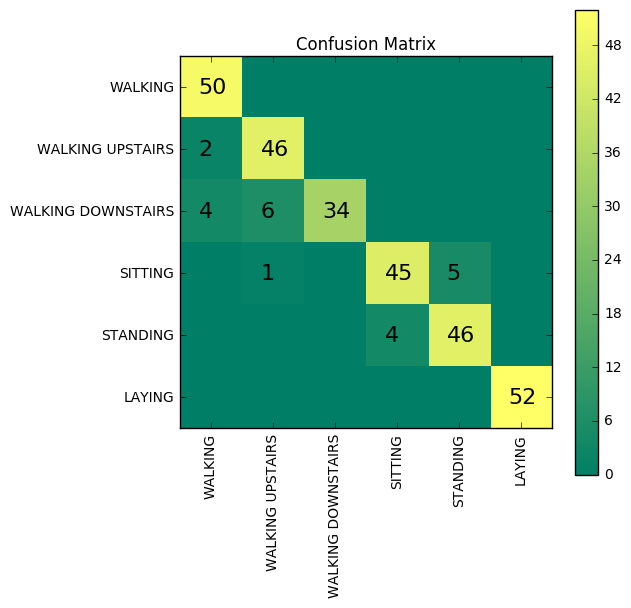

In [205]:
# Testing for SVC RBF kernel
svc_grid = SVC(C=10, kernel='rbf', degree=3, gamma=0.025119, 
            coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False,
            max_iter=-1, random_state=None)
svc_grid.fit(X_train[::10], y_train[::10])
y_pred_svc_grid = svc_grid.predict(X_test[::10])
print 'GridSearch SVC Metrics:'
svc_acc, svc_prec, svc_rec, svc_cm, svc_cm_full = get_scores(y_test[::10],y_pred_svc_grid)
show_plot_confusion_matrix(svc_cm)

### Now we plot the decision regions for Walking and Laying with SVM RBF Classifier

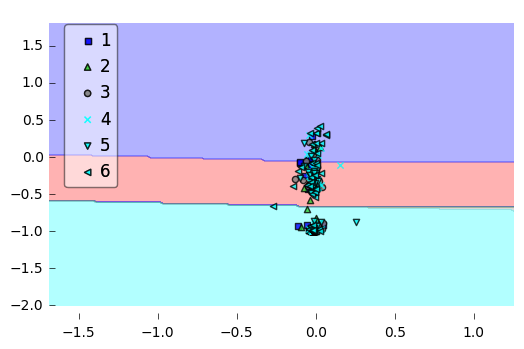

In [195]:
#For Plotting Decision Regions For Walking and Laying with SVM - RBF Kernel
p = X_train[::10, [1,6]]
svc_linear_small = SVC(C=C_grid, kernel='rbf', degree=3, gamma=gamma_grid, 
            coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False,
            max_iter=-1, random_state=None)
svc_linear_small.fit(p, y_train[::10])
plot_decision_regions(p, y_test[::10], svc_linear_small, res=0.02, legend=2)

### Running SVC with 'linear' kernel

Linear SVC Metrics:
Accuracy:  91.19
Precision:  91.51
Recall:  90.93
Confusion Matrix (Activities: Walking, Upstairs, Downstairs, Standing, Sitting, Laying
[[50  0  0  0  0  0]
 [ 5 42  1  0  0  0]
 [ 3  5 36  0  0  0]
 [ 0  1  0 44  6  0]
 [ 0  0  0  5 45  0]
 [ 0  0  0  0  0 52]]
Confusion Matrix & Scores (Actual Activities & Precision vs. Predicted Activies & Recall; Total Accuracy)
[[  50.      0.      0.      0.      0.      0.    100.  ]
 [   5.     42.      1.      0.      0.      0.     87.5 ]
 [   3.      5.     36.      0.      0.      0.     81.82]
 [   0.      1.      0.     44.      6.      0.     86.27]
 [   0.      0.      0.      5.     45.      0.     90.  ]
 [   0.      0.      0.      0.      0.     52.    100.  ]
 [  86.21   87.5    97.3    89.8    88.24  100.     91.19]]


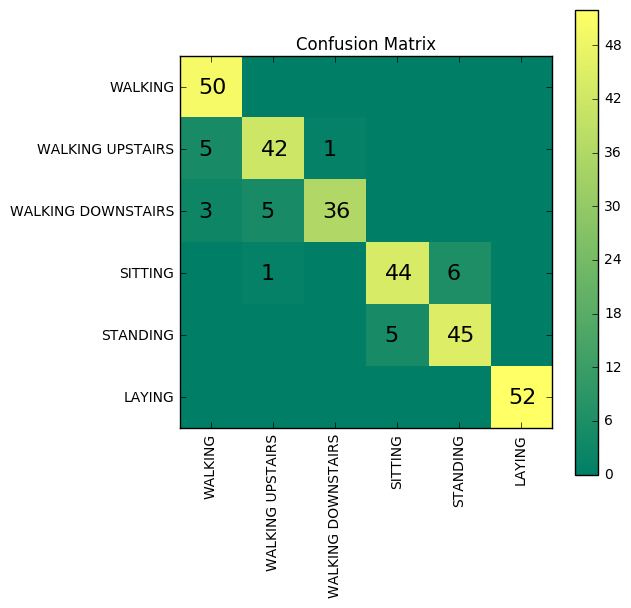

In [206]:
# Testing for SVC Linear kernel
svc_linear = SVC(C=10, kernel='linear', degree=3, gamma=0.025119, 
            coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False,
            max_iter=-1, random_state=None)
svc_linear.fit(X_train[::10], y_train[::10])
y_pred_svc_lin = svc_linear.predict(X_test[::10])
print 'Linear SVC Metrics:'
svc_lin_acc, svc_lin_prec, svc_lin_rec, svc_lin_cm, svc_lin_cm_full = get_scores(y_test[::10],y_pred_svc_lin)
show_plot_confusion_matrix(svc_lin_cm)

### Now we plot the decision regions for Walking and Laying with SVM Linear Classifier

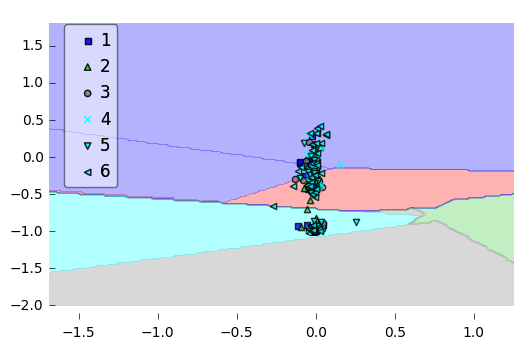

In [207]:
#For Plotting Decision Regions For Walking and Laying with SVM - Linear Kernel
p = X_train[::10, [1,6]]
svc_linear_small = SVC(C=C_grid, kernel='linear', degree=3, gamma=gamma_grid, 
            coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False,
            max_iter=-1, random_state=None)
svc_linear_small.fit(p, y_train[::10])
plot_decision_regions(p, y_test[::10], svc_linear_small, res=0.02, legend=2)

## Start calling functions for Unsupervised Classification
### Classifying using KNN

In [208]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train[::10], y_train[::10])
y_pred_knn = knn.predict(X_test[::10])
print('The accuracy of the knn classifier is {:.2f} out of 1 on training data'.format(knn.score(X_train[::10], y_train[::10])))
print('The accuracy of the knn classifier is {:.2f} out of 1 on test data'.format(knn.score(X_test[::10], y_test[::10])))

The accuracy of the knn classifier is 0.93 out of 1 on training data
The accuracy of the knn classifier is 0.86 out of 1 on test data


### Using the same abstracted methods, getting accuracy, precision, confusion matrix for KNN

Accuracy:  86.44
Precision:  87.9
Recall:  86.08
Confusion Matrix (Activities: Walking, Upstairs, Downstairs, Standing, Sitting, Laying
[[49  1  0  0  0  0]
 [ 7 41  0  0  0  0]
 [ 7  6 31  0  0  0]
 [ 0  1  0 38 12  0]
 [ 0  0  0  5 45  0]
 [ 0  0  0  0  1 51]]
Confusion Matrix & Scores (Actual Activities & Precision vs. Predicted Activies & Recall; Total Accuracy)
[[  49.      1.      0.      0.      0.      0.     98.  ]
 [   7.     41.      0.      0.      0.      0.     85.42]
 [   7.      6.     31.      0.      0.      0.     70.45]
 [   0.      1.      0.     38.     12.      0.     74.51]
 [   0.      0.      0.      5.     45.      0.     90.  ]
 [   0.      0.      0.      0.      1.     51.     98.08]
 [  77.78   83.67  100.     88.37   77.59  100.     86.44]]


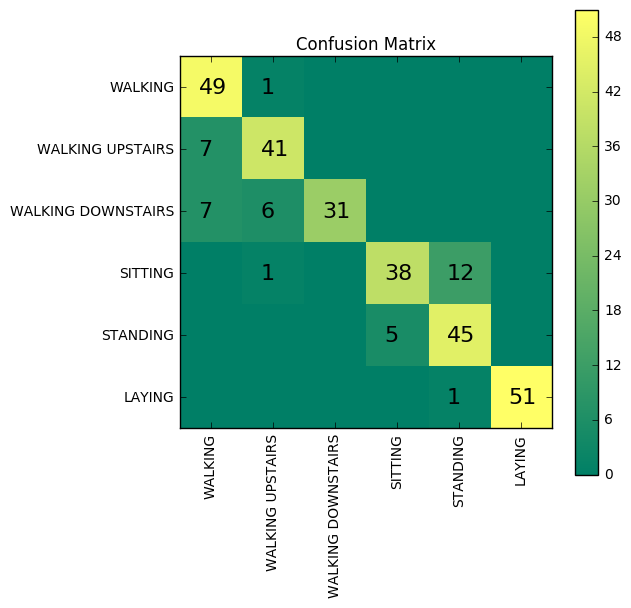

In [209]:
knn_lin_acc, knn_lin_prec, knn_lin_rec, knn_lin_cm, knn_lin_cm_full = get_scores(y_test[::10],y_pred_knn)
show_plot_confusion_matrix(knn_lin_cm)

In [210]:
### Now we plot the decision regions for Walking and Laying with KNN Classifier

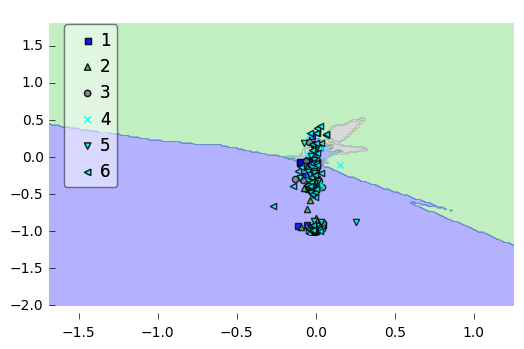

In [211]:
#For Plotting Decision Regions For Walking and Laying with KNN Unsupervised
X = X_train[::10, [1,6]]
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X, y_train[::10])
plot_decision_regions(X, y_test[::10], knn2, res=0.02, legend=2)